#### Linear regressor for more than one feature

In [5]:
# Import the data from the dataset using the pandas module
import pandas as pds
uncleaned_data = pds.read_csv('Train.csv')
print(type(uncleaned_data))

print("\n\n\n The summary of the data")
print(uncleaned_data.describe())

#Extracting the data from the frame
data = uncleaned_data.values
print("\n\n\n",type(data))

<class 'pandas.core.frame.DataFrame'>



 The summary of the data
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1600.000000  1600.000000  1600.000000  1600.000000  1600.000000   
mean      0.004114    -0.027604    -0.044459    -0.042408     0.012005   
std       0.997338     1.021776     1.011768     1.017189     0.978654   
min      -3.380125    -3.314844    -3.153118    -3.250169    -2.851707   
25%      -0.647165    -0.705030    -0.706385    -0.709504    -0.615880   
50%      -0.000360    -0.043769    -0.041272    -0.029756    -0.013527   
75%       0.682118     0.645442     0.639130     0.646290     0.650089   
max       3.287205     3.438895     3.216176     2.985410     3.321770   

            target  
count  1600.000000  
mean      0.318835  
std     110.741562  
min    -379.829794  
25%     -71.897040  
50%      -0.610665  
75%      71.226603  
max     337.643014  



 <class 'numpy.ndarray'>


In [7]:
## Using the stastical data analysis we can do the standardization and we need to perform the rescaling

##Since as shown above the mean is already 0 and std is 1 so we move ahead
X = data[:,0:5]
Y = data[:,5]

print("The shape of the X is {}".format(X.shape))
print("The shape of the Y is {}".format(Y.shape))

The shape of the X is (1600, 5)
The shape of the Y is (1600,)


In [69]:
## Prepare model

import numpy as np

class LinearRegressor:
    def __init__(self,X,Y):
        """Initialize the data variables"""
        self.X = X
        self.Y = Y
        self.theta = None ##Decide while traning
    
    def makeXSutiable(self):
        """Append the one to the X"""
        one = np.ones((self.X.shape[0],1))
        self.X = np.hstack((one,self.X))
        return
    
    def makeXSutiableXTest(self,XTest):
        """Append the one to the X"""
        one = np.ones((1,))
        XTest = np.hstack((one,XTest))
        return XTest
    
    def hypothesis(self,x):
        """Return the prediction on the current value"""
        # x = (1*n) theta = (1*n)
        theta = self.theta
        return np.dot(x,theta)
    
    def errorFn(self):
        """Return the error"""
        X = self.X
        Y = self.Y
        error = 0.0
        for i in range(X.shape[0]):
            error += (self.hypothesis(X[i]) - Y[i])**2
        return error/X.shape[0]
    
    def gradientDescent(self,learning_rate):
        """Implement the gradient descent equation"""
        numberOfFeatures = self.theta.shape[0]
        grad = np.zeros((numberOfFeatures,1))
        
        X = self.X
        Y = self.Y
        
        for i in range(numberOfFeatures):
            for j in range(X.shape[0]):
                grad[i] += (self.hypothesis(X[j]) - Y[j])*X[j][i]
        
        grad = grad/X.shape[0]
        
        self.theta -= learning_rate*grad
        return
    
    def fit(self,learning_rate=0.1):
        """Train the model"""
        currItr = 0
        itr = 300
        
        self.makeXSutiable()
        ##Initialize the theta
        self.theta = np.zeros((self.X.shape[1],1))
        
        errorList = []
        while currItr<=itr:
            errorList.append(self.errorFn())
            self.gradientDescent(learning_rate)
            currItr += 1
        return errorList,self.theta
    
    def verifyModelByError(self,errorList):
        """Help in checking if error is reducing"""
        import matplotlib.pyplot as plt
        plt.style.use("seaborn") ##My fav
        plt.plot(errorList)
        plt.title("Error plot")
        plt.xlabel("Iteration number")
        plt.ylabel("Error")
        plt.show()
        return
    
    def predict(self,xTest):
        """Return the prediction"""
        xtest = self.makeXSutiableXTest(xTest)
        print(xtest)
        return self.hypothesis(xtest)

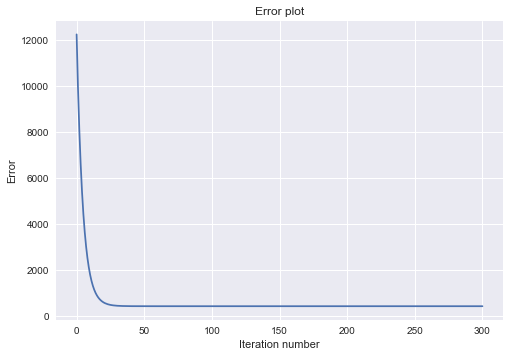

In [78]:
lr = LinearRegressor(X,Y)
errorList,theta = lr.fit()
lr.verifyModelByError(errorList)